## EDA OkCupid

### import laibraries

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### read data

In [252]:
profiles_data=pd.read_csv('profiles1.csv')
#profiles_data.info()

In [253]:
#profiles_data.head(3)

### basic graphs

In [254]:
#sns.set()
#sns.color_palette(palette="muted")
sns.set_palette(palette='RdBu')

#### lets see the age distrabution

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


32.3402895939679

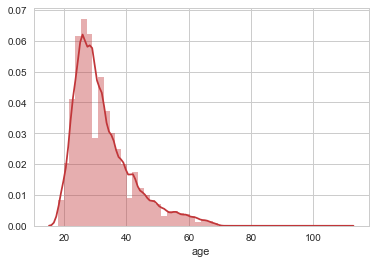

In [255]:
sns.distplot(profiles_data['age'])
mean_age=profiles_data['age'].mean()
mean_age

#### we want to check the distrabiotions of the age when we saparete the users to M/F and by the different incomes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

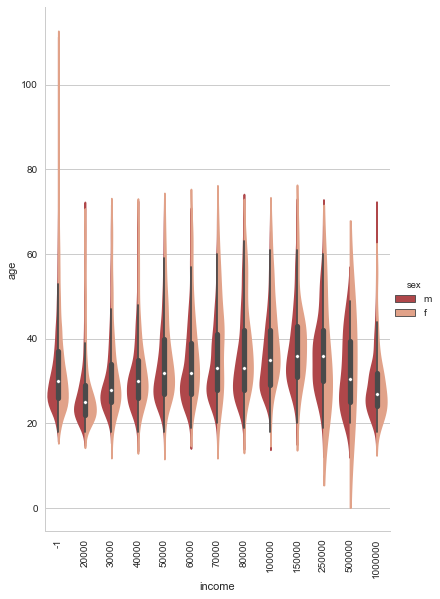

In [257]:
g3=sns.factorplot(x='income', y='age', hue='sex', data=profiles_data, kind='violin',split=True, size=8,aspect=0.7)
plt.xticks(rotation='vertical')

#### In general we can see the the age distrabiotion pik has rigth shift as the income increase, which means that young pepole earn less, but it is not true to the highest incomes...also in the highest income the age of the women is lower than that of men

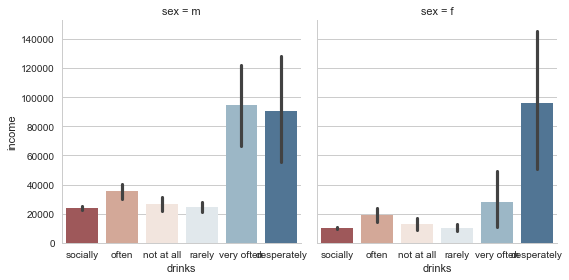

In [270]:
g1=sns.factorplot(x='drinks', y='income', col='sex', data=profiles_data, kind='bar', saturation=.5)
#(g1.set_axis_labels('Frequency of Drinking','Income ($)').set_xticklabels(['very often', 'often' ,'rarely' ,'desperately', 'not at\n all' ,'socially'  ]))

##### the avarage income of  women is much lower than the men as we can see in the graph above:

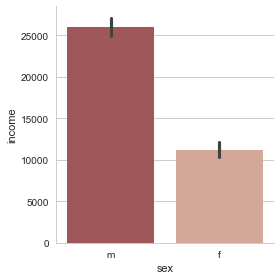

In [259]:
g2=sns.factorplot(x='sex', y='income',  data=profiles_data, kind='bar', saturation=.5)
#(g2.set_titles('Income vs. Sex'))

In [267]:
profiles_data=profiles_data.assign(main_deit=pd.Series([str(x).split()[-1] for x in profiles_data['diet']]))
profiles_data=profiles_data.assign(main_religion=pd.Series([str(x).split()[0] for x in profiles_data['religion']]))

In [268]:
profiles_data['e']=1
DrinkbyDiet=profiles_data.groupby(by=['main_deit', 'main_religion' ]).count()['e'].unstack()
sumOnDiet=DrinkbyDiet.sum(axis=1).values
p_byDiet=DrinkbyDiet.transpose()/sumOnDiet
p_byDiet= p_byDiet.drop('nan',0)
p_byDiet= p_byDiet.drop('nan',1)

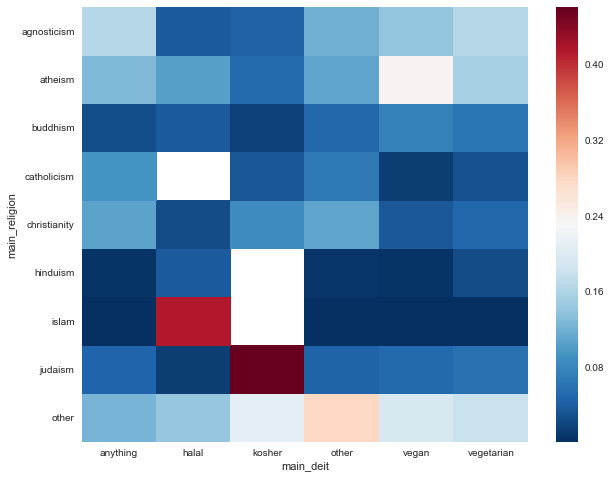

In [269]:
plt.figure(figsize=(10,8))
sns.heatmap(p_byDiet,cmap='RdBu_r')